# Credit Card Fraud Detection

<img src="https://www.secplicity.org/wp-content/uploads/2016/12/credit-card-hack-750x501.jpg" height=200>

<b>Credit Cards have become a very important part of our lives these days. These small pieces of plastic are slowly replacing cash as the world becomes more digital. But, these credit cards when fallen into the wrong hands often result in huge losses of money and important information.<br>
Now, with The power of machine learning we try to see if we can predict and avoid credit card frauds!

#### Importing Needed Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
Data=pd.read_csv("creditcard.csv")

In [4]:
Data.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


We have 31 Columns in total, A column which specifies the time of Transasction(Time),The Amount of Transactions(Amount) and A columns of Class(0 for Non-Fraudlent and 1 for Fraudlent). Rest of the Columns are Encrypted to prevent the leakge of important Data.
<br>
We will be making Predictions on the Columns of Class.<br>
The Column on whih Predictions are made is called <u><b>Class Label</b></u>

#### Count Plot <br>
Count Plot helps us compare the distribution of our data quantitaively on the basis of count.

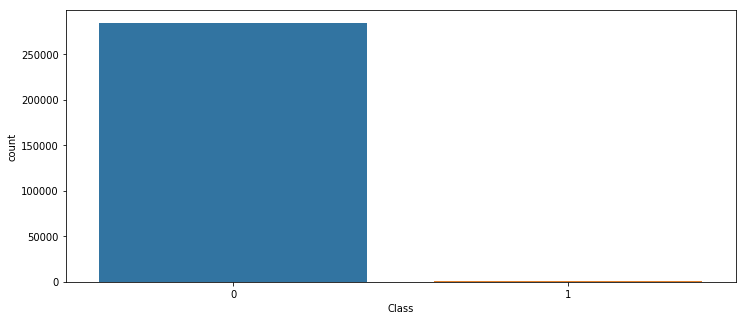

In [5]:
plt.figure(figsize=(12,5))
sns.countplot(Data['Class'])
plt.show()

#### The Blue Bar here Tells us the amount of Non-Fraudlent Transactions in our Data,and the orange bar in this plot tells us the amount of Fraudlent Transactions. Thus, we can see that most of the Transactions in our dataset is Non-Fraudlent.

In [6]:
print("The Percent of Non-Fraudlent Transactons are: {:.2f}%".format(Data[Data['Class']==0].shape[0]*100/Data.shape[0]))

The Percent of Non-Fraudlent Transactons are: 99.83%


In [7]:
print("No of Non-Fraudlent Transactions: {}".format(Data[Data['Class']==0].shape[0]))
print("No of Fraudlent Transactions: {}".format(Data[Data['Class']==1].shape[0]))

No of Non-Fraudlent Transactions: 284315
No of Fraudlent Transactions: 492


Now,We see that <b>99.83%</b> of our data is Non-Fraudlent Transactions.<br> We have just <b><u>492</u></b> Fraudlent Transactions as comapred to <b><u>284315</u></b> Non-Fraudlent Transactions

This brings us to a severe problem :-<br>
<b>Imbalance</b><br>
We'll Talk about Imbalance and the prooblems it causes later in this study, Let's first dig deeper to find out some relationship within the dataset.

### Scatter Plot
Scatter Plots help us to visualise the relationship between two columns of the dataset.<br>
we take one column on each axis and we plot a points according to their values.<br>
Scatter plots often provide us with valuable insights for our data.

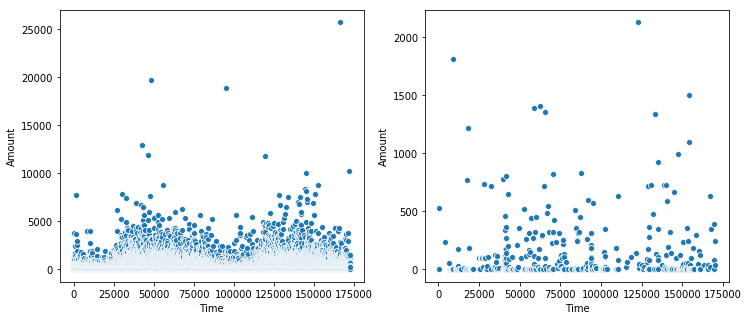

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.scatterplot(data=Data[Data['Class']==0],x='Time',y='Amount')
plt.subplot(122)
sns.scatterplot(data=Data[Data['Class']==1],x='Time',y='Amount')
plt.show()

Above plots(Scatter Plots) were plotted to see if the data there was some relationship between the Amount of transactions and the Time of Transactions. The Plot on the left is the plot for the Non-Fraudlent Transactions, And the plot on the right is the plot for Fraudlent Transaction.<br>
In This Case we see that Scatter plot is unable to provide uswith some valuable insights about data

<h3> Imbalance </h3><br>
Remember we talked about Imbalance?<br>
Good, Let's Talk about it now,<br>
Imbalance can cause severe problems in our machine learning techniques.<br><br>
Let's talk about it with help of an example <br>
Suppose, we have data for 100 people(90 males and 10 females) in which we predict thier gender.<br>
Now, If i make a really bad(Dumb) model which is to predict every persons genders as Male.The model has messed up hugely. but when we compute the accuracy of such model it comes out to be 90%!<br>
What!?<br>
These are the kinds of problems imbalance can cause in our Machine Learning model.<br>

P.s. :- The kind of model we talked about above,which doesn't take into consideration the data and just maked messed up predictions is called an <b> UnderFitted Model.</b> 

Now, Let's talk about our data,<br> Because ofthe amount of imbalance we have in our data, <br>
if we make a severely underfitted model which would predict every transaction to be Non-Fraudlent, it would still somehow get the accuracy of 99.83%. In a real life scenario, Not only would this lead to great financial losses for the people. <br>
Now,We need to do something about the imbalance in our data.

### Undersampling and OverSampling
To treat imbalanced data, we need to balnce our data(Duh!). This can be done in two ways,<br>
<ol>
    <li> We can either make copies of the Fraudlent-Transactions,till it's number becomes equal tothe number of Non-Fraudlent Transactions.This is called <b><u>Over-Sampling</u></b></li>
    <br> or 
    <br>
    <br>
    <li>We can divide the the Non-Fraudlent Transactions in parts equal in length to the Fraudlent Transactions Data.This is called <b><u>Undesampling</u></b></li>

In This Case, We will use undersampling to balance our dataset<br>
We will divide Non-Fraudlent Transactions till it's equal to the length to Fraudlent Transactions.
We will then train diffrent models on combination of diffrent Non-Fraudlent Transactions Data but the same Transactions Data.<br>
We will in the end take the mean of the accuracies we get, and hence, we can consider it a trustable metric for evaluating our ensemble of models.<br>

P.s.:- Ensemble means combining diffrent model to increase performance.

In [9]:
Fraud=Data[Data['Class']==1]

In [10]:
Non_Fraud=Data[Data['Class']==0]


The Variables Fraud and Non_Fraud contain the data for Fraudlent and Non-Fraudlent Transactions respectively.

In [13]:
L=list()
for i in range(0,int(Non_Fraud.shape[0]/Fraud.shape[0])):
    L.append(Non_Fraud.sample(n=Fraud.shape[0],replace=False).values.tolist())
L.append(Non_Fraud.sample(n=Non_Fraud.shape[0]%Fraud.shape[0],replace=False).values.tolist())

In the above cell we have split our Non-Fraudlent Transactions Data randomly and have made a list containing the Small splits of the data.

We will now concatenate the Datasets for every elemant in the list and train a model on it. Then we will compute the accuracy for each model and store it in a list.
The Machine learning model used is <b><u>Logistic Regression</u></b>

### Logistic Regression

It is a classification model,which uses a certain sigmoid function as decision surface to compute the odds of a point belonging to a specific class. It then assigns the point the class it has more chance it has to belong to.

In [21]:
accuracy=list()
for i in L:
    D=pd.concat([pd.DataFrame(i,columns=[x for x in Fraud.columns]),Fraud])
    T=D['Class']
    D.drop('Class',axis=1)
    LocalXTrain,LocalXTest,LocalYTrain,LocalYTest=train_test_split(D,T,test_size=0.2,random_state=2)
    Lr=LogisticRegression()
    Lr.fit(LocalXTrain,LocalYTrain)
    Pred=Lr.predict(LocalXTest)
    acc=accuracy_score(Pred,LocalYTest)
    accuracy.append(acc)
    

Here weare creating an ensemble of various machine learning models. Here we are concatenating bothe the datasets and then splitting it into training and testing data, then we are training the model on the training data and evaluating it on testing data. We are then storing the accuracies in a list.<br>

P.S. :- We generally split the data into training and testing data into 80:20 ratio respectively.

Now,Let's Check the mean of the accuracies stored as it will give us an idea of how well our model has performed.

In [22]:
np.mean(accuracy)

0.934352327842922

<b>0.934 or 93.4%</b><br>
This tells us that our model has performed exceptionally well.<br>
it can classify the incoming transactions with 93.4% accuracy!<br>
'Yipeee!!!' XD

Now Let's Try this same ensemble using Decision Tree as Base Learner.
### Decision Tree
Decision Tree is a classification algorithm which creates a tree of sorts using if-else statements using "Information Gain" and "Gini Index"

In [23]:
accuracy=list()
for i in L:
    D=pd.concat([pd.DataFrame(i,columns=[x for x in Fraud.columns]),Fraud])
    T=D['Class']
    D.drop('Class',axis=1)
    LocalXTrain,LocalXTest,LocalYTrain,LocalYTest=train_test_split(D,T,test_size=0.2,random_state=1)
    Lr=DecisionTreeClassifier()
    Lr.fit(LocalXTrain,LocalYTrain)
    Pred=Lr.predict(LocalXTest)
    acc=accuracy_score(Pred,LocalYTest)
    accuracy.append(acc)
print(np.mean(accuracy))
print(np.std(accuracy))

1.0
0.0


What??<br>
<img src="https://media.giphy.com/media/xT0xeJpnrWC4XWblEk/giphy.gif"><br>
How is this possible?<br>
Does this mean that our model is perfect?<br>
It just gave us 100% accuracy!

Well,Unfortunately No!<br>
This is a case called <b>OverFitting</b>.


<b><u>Overfitting</u></b> is a case where our model performs exceptionally well on training data but fails miserably when it comes to real life data.<br>
There is a reason for it<br>
Real life data is not always as clean and it doesn't always follow the same trend as training data.

Hence,<br>
OverFitting Generally leads to our model performing good on training data and failing miseraby at the test data.

<img src="https://cdn-images-1.medium.com/max/1080/1*6vPGzBNppqMHllg1o_se8Q.png">

So, In machine learning,<br>
we prefer good fitted model on the data.<br>
But,Not so much that it overfits!